# Buffett Indicator
### The Buffett Indicator is the ratio of total United States stock market valuation to GDP.
### The most common measurement of the aggregate value of the US stock market is the Wilshire 5000.

Source:
[FRED](https://fred.stlouisfed.org/graph/?g=qLC)

In [25]:
import pandas as pd
import numpy as np
import os
from dotenv import load_dotenv
import fredapi
from fredapi import Fred
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
load_dotenv()

True

In [27]:
api_key = os.getenv('FRED_API_KEY')
fred = Fred(api_key=api_key)

In [28]:
# Pull WIlshire 5000 Price data
wilshire_price = fred.get_series('WILL5000PR', observation_start='1970-01-01')
wilshire_price = pd.DataFrame(wilshire_price, columns={'wilshire5K'})
wilshire_price = wilshire_price.dropna()
wilshire_price.tail()

,wilshire5K
2022-12-02,41324.08
2022-12-05,40510.83
2022-12-06,39915.31
2022-12-07,39830.21
2022-12-08,40132.30


In [29]:
# Pull US GDP data and set frequency data to daily and ffill data
gdp_data = fred.get_series('GDP', observation_start='1970-01-01').asfreq('d').ffill()
gdp_data = pd.DataFrame(gdp_data, columns={'GDP'})
gdp_data.tail()

,GDP
2022-06-27,25248.476
2022-06-28,25248.476
2022-06-29,25248.476
2022-06-30,25248.476
2022-07-01,25698.960


In [30]:
# Concat dataframes to calculate Buffett Indicator
combined = pd.concat([wilshire_price, gdp_data],  axis=1).dropna()
combined['buffett_ind'] = combined['wilshire5K'] / combined['GDP']
combined.tail()

,wilshire5K,GDP,buffett_ind
2022-06-27,39574.58,25248.476,1.567405
2022-06-28,38774.65,25248.476,1.535722
2022-06-29,38697.67,25248.476,1.532673
2022-06-30,38338.74,25248.476,1.518458
2022-07-01,38773.35,25698.960,1.508752


In [31]:
# Calculate Buffet Indicator stats
stats = combined['buffett_ind'].describe()
stats

count    10845.000000
mean         0.872906
std          0.363671
min          0.312246
25%          0.581939
50%          0.847125
75%          1.116607
max          2.017122
Name: buffett_ind, dtype: float64

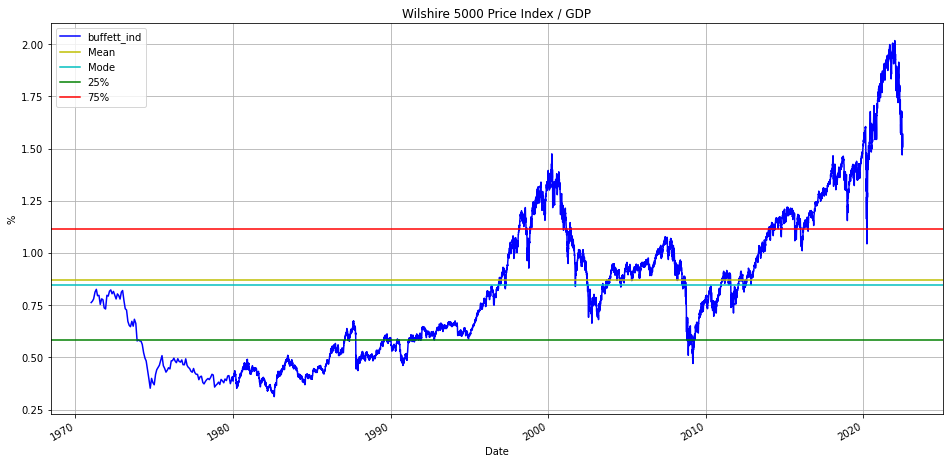

In [32]:
# Plot Buffet Indicator 
combined['buffett_ind'].plot(figsize=(16,8), title='Wilshire 5000 Price Index / GDP', grid=True, xlabel='Date', ylabel= '%', c='b')
plt.axhline(stats['mean'], c='y', label='Mean')
plt.axhline(stats['50%'], label='Mode', c='c')
plt.axhline(stats['25%'], label='25%', c='g')
plt.axhline(stats['75%'], label='75%', c='r')
plt.legend()